In [85]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [86]:
df_reg_disc = pd.DataFrame()

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    df_loc = pd.read_csv(f'results/Ford_A/Regular_Disc/Same_disc/aa_res_Ford_A_{0}_alpha={alpha}.csv', index_col=0)
    df_loc['method_attack'] = 'reg_disc_same'
    df_loc['alpha'] = alpha

    df_reg_disc = pd.concat([df_reg_disc, df_loc])


print(df_reg_disc.shape)
df_reg_disc.head()

(1530, 8)


,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000288,0.001,reg_disc_same,0.001
1,1,0.755227,0.755006,0.680578,0.000245,0.001,reg_disc_same,0.001
2,2,0.749848,0.749590,0.675103,0.000253,0.001,reg_disc_same,0.001
3,3,0.742803,0.742525,0.667921,0.000400,0.001,reg_disc_same,0.001
4,4,0.735682,0.735344,0.660880,0.000576,0.001,reg_disc_same,0.001


In [87]:
df_reg_disc_diff = pd.DataFrame()

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    df_loc = pd.read_csv(f'results/Ford_A/Regular_Disc/Diff_disc/aa_res_Ford_A_{0}_alpha={alpha}.csv', index_col=0)
    df_loc['method_attack'] = 'reg_disc_diff'
    df_loc['alpha'] = alpha

    df_reg_disc_diff = pd.concat([df_reg_disc_diff, df_loc])


print(df_reg_disc_diff.shape)
df_reg_disc_diff.head()

(1530, 8)


,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000329,0.001,reg_disc_diff,0.001
1,1,0.755227,0.755006,0.680578,0.000298,0.001,reg_disc_diff,0.001
2,2,0.749848,0.749590,0.675103,0.000326,0.001,reg_disc_diff,0.001
3,3,0.742803,0.742525,0.667921,0.000367,0.001,reg_disc_diff,0.001
4,4,0.735682,0.735344,0.660880,0.000585,0.001,reg_disc_diff,0.001


In [88]:
df_reg = pd.DataFrame()

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    df_loc = pd.read_csv(f'results/Ford_A/Regular/aa_res_Ford_A_{0}_alpha={alpha}.csv', index_col=0)
    df_loc['method_attack'] = 'reg'
    df_loc['alpha'] = alpha

    df_reg = pd.concat([df_reg, df_loc])


print(df_reg.shape)
df_reg.head()

(1530, 8)


,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000218,0.001,reg,0.001
1,1,0.755227,0.755006,0.680578,0.000282,0.001,reg,0.001
2,2,0.749848,0.749590,0.675103,0.000294,0.001,reg,0.001
3,3,0.742803,0.742525,0.667921,0.000356,0.001,reg,0.001
4,4,0.735682,0.735344,0.660880,0.000477,0.001,reg,0.001


In [89]:
df_original = pd.read_csv(f'results/Ford_A/Original/aa_res_Ford_A_{0}_alpha=0.001.csv', index_col=0)
df_original['method_attack'] = 'original'
df_original['alpha'] = 0
df_original.head()

,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000197,0.001,original,0
1,1,0.755227,0.755006,0.680578,0.000276,0.001,original,0
2,2,0.749848,0.749590,0.675103,0.000346,0.001,original,0
3,3,0.742803,0.742525,0.667921,0.000423,0.001,original,0
4,4,0.735682,0.735344,0.660880,0.000529,0.001,original,0


In [90]:
df_res = pd.concat([df_reg_disc, df_reg_disc_diff, df_reg, df_original])

print(df_res.shape)
df_res.head()

(4845, 8)


,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000288,0.001,reg_disc_same,0.001
1,1,0.755227,0.755006,0.680578,0.000245,0.001,reg_disc_same,0.001
2,2,0.749848,0.749590,0.675103,0.000253,0.001,reg_disc_same,0.001
3,3,0.742803,0.742525,0.667921,0.000400,0.001,reg_disc_same,0.001
4,4,0.735682,0.735344,0.660880,0.000576,0.001,reg_disc_same,0.001


# Analysis

In [97]:
alpha = 1
eps = df_res.eps.unique()[1]
mask_alpha_eps = (df_res['eps'] == eps) & (df_res['alpha'].isin([0, alpha]))

df_filter = df_res[mask_alpha_eps]
df_filter

,n steps,ACC,ROC AUC,PR AUC,HID,eps,method_attack,alpha
0,0,0.760606,0.760334,0.686418,0.000741,0.005623,reg_disc_same,1.0
1,1,0.725758,0.725349,0.651178,0.000903,0.005623,reg_disc_same,1.0
2,2,0.688182,0.687383,0.616278,0.005551,0.005623,reg_disc_same,1.0
3,3,0.650909,0.649754,0.584077,0.033243,0.005623,reg_disc_same,1.0
4,4,0.618106,0.616626,0.557931,0.035683,0.005623,reg_disc_same,1.0
...,...,...,...,...,...,...,...,...
46,46,0.086515,0.083862,0.483864,0.999982,0.005623,original,0.0
47,47,0.084773,0.082173,0.483864,0.999986,0.005623,original,0.0
48,48,0.082045,0.079530,0.483864,0.999976,0.005623,original,0.0
49,49,0.080000,0.077543,0.483940,0.999987,0.005623,original,0.0


In [98]:
print(eps)

0.0056234132519034


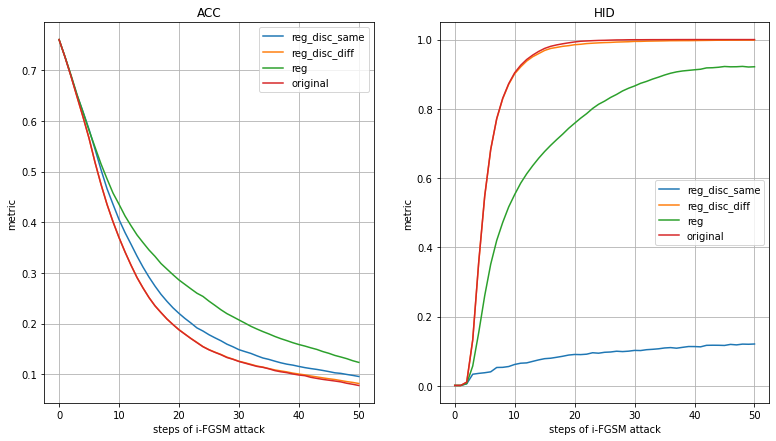

In [99]:
metrics = ['ACC', 'HID']

plt.figure(figsize=(5*len(metrics) + 3, 7))


for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    plt.title(metric)
    for method_attack in df_filter['method_attack'].unique():
        df_filter_viz = df_filter[df_filter['method_attack'] == method_attack]
        plt.plot(df_filter_viz['n steps'], df_filter_viz[metric], label=method_attack)

    plt.xlabel('steps of i-FGSM attack')
    plt.ylabel('metric')
    plt.legend()
    plt.grid()
plt.show()
